In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# from google.colab import drive
# drive.mount("/content/drive")

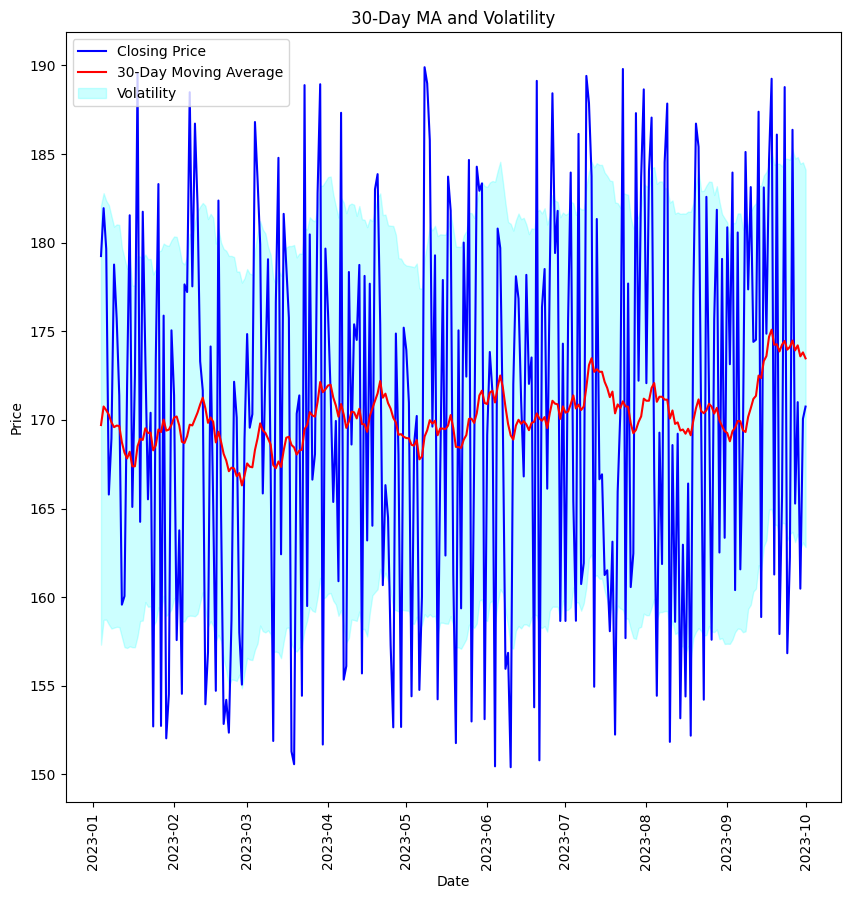

In [8]:
# ---
# Group No. 5
# 1. นาย พุฒิพงศ์ ขำสุวรรณ 6410450559
# 2. นาย ธนสาร วิริยะสุนทรวงศ์ 6410450460
# 3. นาย ศรัณย์ ธราพร 6410451857
# 4.
# ---

group = 5 # อย่าลืมเปลี่ยนเลขกลุ่ม
problem = 1 # ปัญหาที่
data_num = 5 # ชุดข้อมูลที่

# ชุดข้อมูลเก็บใน /in
in_path = "./dataset/P"+str(problem)+"/in/"
data_path = in_path+"p"+str(problem)+"_input_dataset_"+str(data_num)+".csv"

# ผลลัพธ์เก็บใน /out
out_path = "./dataset/P"+str(problem)+"/out/"
result_path = out_path+"p"+str(problem)+"_group"+str(group)+"-output"+str(data_num)+".csv"
png_path = out_path+"p"+str(problem)+"_group"+str(group)+"-plot"+str(data_num)+".png"

# อ่านข้อมูล
data = pd.read_csv(data_path)

# --- เริ่มเขียนโค้ดตรงนี้ ---
# แปลงคอลัมน์ 'Date' เป็นรูปแบบวันที่
data['Date'] = pd.to_datetime(data['Date'])

# เรียงลำดับข้อมูลตามวันที่
data = data.sort_values(by='Date')

# คำนวณเฉลี่ยเคลื่อนที่ในช่วง 30 วัน (30-Day Moving Average):
data['30MA'] = data['Close'].rolling(window=30).mean()

# คำนวณความผันผวน
data['Volatility'] = data['Close'].rolling(window=30).std()

# ลบแถวที่ไม่มีค่า MA ออก
data = data.dropna(subset=['30MA'])

# สร้างกราฟเส้นเพื่อแสดงราคาปิดและเฉลี่ยเคลื่อนที่ โดยมีขนาด 1000x1000
plt.figure(figsize=(10, 10))
plt.plot(data['Date'], data['Close'], label='Closing Price', color='b')
plt.plot(data['Date'], data['30MA'], label='30-Day Moving Average', color='r')
plt.fill_between(data['Date'], data['30MA'] - data['Volatility'], data['30MA'] + data['Volatility'], alpha=0.2, label='Volatility', color='cyan')
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('30-Day MA and Volatility')

# ใส่ legend เพื่อให้ข้อมูลในกราฟมีความชัดเจนมากขึ้น
plt.legend()

# --- สิ้นสุดโค้ดตรงนี้ ---

# เซฟผลลัพธ์
data.to_csv(result_path, index=False)

# แสดงผลลัพธ์
data.head()

# เซฟกราฟ
plt.savefig(png_path, dpi=100)

# แสดงผลกราฟ
plt.show()